In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 1
M, N = 10000, 700 # в выходном двумерном массиве M - кол-во строк, а также точек в разбиении по времени
                  #                              N - кол-во столбцов, точек в разбиении по координате
tau = 0.0001

In [3]:
u0 = lambda x: x * (1. - x / L) ** 2

In [4]:
def TMA(p, N): # tridiagonal matrix algorithm == метод прогонки
    h = L / N
    r = tau / h ** 2
    D = [p[0]] + [r * p[i - 1] + (2 - 2 * r) * p[i] + r * p[i + 1] for i in range(1, N - 1)] + [p[-1]]
    A = [0] + [-r         for i in range(N - 2)] + [0]
    B = [1] + [2 + 2 * r  for i in range(N - 2)] + [1]
    C = [0] + [-r         for i in range(N - 2)] + [0]
    for i in range(1, N):          # прямой ход метода Гаусса -- избавляемся от коэффициентов под главной диагональю
        xi = A[i] / B[i - 1]
        B[i] -= xi * C[i - 1]
        D[i] -= xi * D[i - 1]
    y = np.zeros(N)
    y[N - 1] = D[N - 1] / B[N - 1] # обратный ход метода Гаусса
    for i in np.arange(N - 2, -1, -1):
        y[i] = (D[i] - C[i] * y[i + 1]) / B[i]
    return y

In [5]:
x = np.linspace(0, L, N)

In [6]:
data = np.zeros((M, N))
data[0] = u0(x) # заполнение первой строки массива данных начальным условием u(x, 0) = u0(x)
                # левый и правый столбец уже заполнены нулями, что отвечает условию u(0, t) = u(L, t) = 0
x_max, u_max = np.zeros(M), np.zeros(M)
x_max[0], u_max[0] = x[data[0].argmax()], data[0].max()
for i in range(1, M):
    data[i] = TMA(data[i - 1], N)
    x_max[i], u_max[i] = x[data[i].argmax()], data[i].max()

<IPython.core.display.Javascript object>


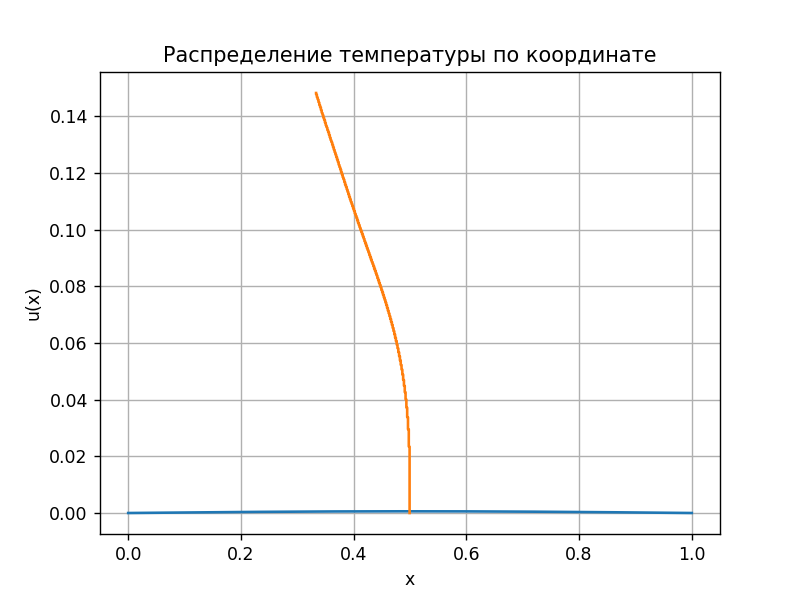

interactive(children=(IntSlider(value=4999, description='t', max=9999), Output()), _dom_classes=('widget-inter…

In [7]:
fig = plt.figure()

ax1 = fig.add_subplot()
line1, = ax1.plot(x, data[0])

line2, = ax1.plot(x_max, u_max)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Распределение температуры по координате')
plt.grid()

def update(t):
    line1.set_ydata(data[t])
    fig.canvas.draw_idle()

interact(update, t=(0, M - 1));

<IPython.core.display.Javascript object>


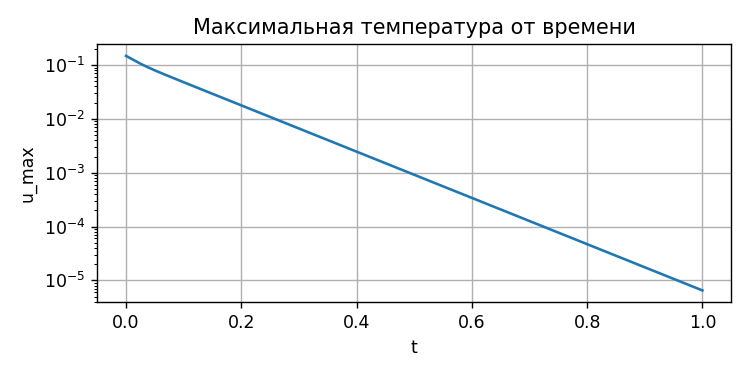

In [8]:
T = [i * tau for i in range(M)]
plt.figure(figsize=(6,3))

plt.plot(T, u_max)
plt.yscale('log')
plt.title('Максимальная температура от времени')
plt.xlabel('t')
plt.ylabel('u_max')
plt.grid()

plt.tight_layout()
plt.show()

---

In [9]:
def OLS(x : np.array, y: np.array):
    K = len(x)
    b = (K * sum(x * y) - sum(x) * sum(y)) / (K * sum (x * x) - sum(x) ** 2)
    a = (sum(y) - b * sum(x)) / K
    y_ols = a * np.ones(K) + b * x
    std = (sum((y - y_ols) ** 2) / K) ** 0.5
    return a, b, std

In [10]:
start = 6000
OLS(np.array(T[start:]), np.log(u_max[start:]))

(-2.0478978213685495, -9.89784795920119, 4.409552364518887e-12)